# 11/10

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

## Ex1 Binary Cross Entropy

$Y = [0.01, 0.01, 0.01]$  
$fx = [0.99, 0.99, 0.01]$

In [2]:
y = [[0.01, 0.01, 0.01]]
fx = [[0.99, 0.99, 0.01]]

In [3]:
def cross_entropy_loss(yHat, y):
    if y == 1:
      return -np.log(yHat)
    else:
      return -(np.log(1 - yHat) * (1 - y) + np.log(yHat) * y)

In [4]:
test = []
for i, j in zip(fx[0], y[0]):
    tmp = cross_entropy_loss(i, j)
    test.append(tmp)
test = tf.reduce_mean(test)
test

<tf.Tensor: shape=(), dtype=float64, numpy=3.058146503109446>

## Ex2 XOR Problem: Two Layer 

### (a) Use Binary Cross Entropy

1. using $f1(z) = tanh(z)$  
2. using $f1(z) = relu(z)$  
$f2(z) = sigmoid(z)$

In [5]:
x_train = np.array([[0.0, 0.0, 1.0], 
                    [1.0, 1.0, 1.0], 
                    [1.0, 0.0, 1.0], 
                    [0.0, 1.0, 1.0]], dtype="float32")

y_train = np.array([[0.0, 1.0, 1.0, 0.0]], dtype="float32").T

In [6]:
x_t = tf.convert_to_tensor(x_train)
y_t = tf.convert_to_tensor(y_train)
print("x_train : \n", x_t)
print("\n")
print("y_train : ", y_t)
print("\n")

x_train : 
 tf.Tensor(
[[0. 0. 1.]
 [1. 1. 1.]
 [1. 0. 1.]
 [0. 1. 1.]], shape=(4, 3), dtype=float32)


y_train :  tf.Tensor(
[[0.]
 [1.]
 [1.]
 [0.]], shape=(4, 1), dtype=float32)




In [7]:
W1 = tf.Variable(initial_value=tf.random.normal([3, 1], stddev=0.03), name="W1", dtype=tf.float32)
b1 = tf.Variable(initial_value=tf.random.normal([1]), name="b1", dtype=tf.float32)

In [8]:
print("weight 1 : \n", W1)
print("\n")
print("bias 1 : ", b1)
print("\n")

weight 1 : 
 <tf.Variable 'W1:0' shape=(3, 1) dtype=float32, numpy=
array([[ 0.03365771],
       [-0.01798138],
       [-0.02820131]], dtype=float32)>


bias 1 :  <tf.Variable 'b1:0' shape=(1,) dtype=float32, numpy=array([-0.58958143], dtype=float32)>




In [9]:
@tf.function
def func_1_relu(x, w, b):
    return tf.nn.relu(tf.add(tf.matmul(x, w), b))

@tf.function
def func_1_tanh(x, w, b):
    return tf.tanh(tf.add(tf.matmul(x, w), b))

In [10]:
@tf.function
def func_2_sigm(x):
    return tf.sigmoid(x)

In [11]:
@tf.function
def model_a(x, W1, b1):
    lay_1_x = func_1_relu(x, W1, b1)
    lay_2_x = func_2_sigm(lay_1_x)
    logits = lay_2_x
    return logits

In [12]:
@tf.function
def cost(x, y, w1, b1):
    fx = model_a(x, w1, b1)
    return tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=fx))

@tf.function
def grad(x, y, w1, b1):
    with tf.GradientTape() as tape:
        loss_ = cost(x, y, w1, b1)
    return [tape.gradient(loss_, [w1, b1]), loss_]

In [13]:
lr_rate = 0.01
epochs = 500
loss_list = []
for k in range(epochs):
    loss_tmp = grad(x_t, y_t, W1, b1)[1]
    delta_W1, delta_b1 = grad(x_t, y_t, W1, b1)[0]
    ch_W1, ch_b1 = delta_W1 * lr_rate, delta_b1 * lr_rate
    W1.assign_sub(ch_W1)
    b1.assign_sub(ch_b1)
    loss_list.append(loss_tmp)

In [14]:
print("weight 1 : \n", W1)
print("\n")
print("bias 1 : ", b1)
print("\n")

weight 1 : 
 <tf.Variable 'W1:0' shape=(3, 1) dtype=float32, numpy=
array([[ 0.03365771],
       [-0.01798138],
       [-0.02820131]], dtype=float32)>


bias 1 :  <tf.Variable 'b1:0' shape=(1,) dtype=float32, numpy=array([-0.58958143], dtype=float32)>




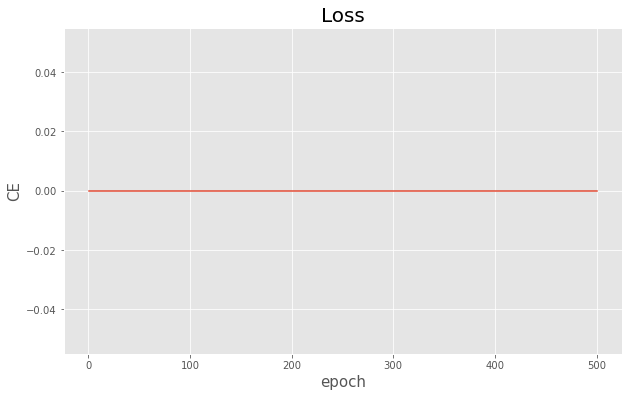

In [15]:
epochs = np.linspace(1, epochs, epochs)
plt.style.use('ggplot')
plt.figure(figsize=(10, 6))
plt.plot(epochs, loss_list)
plt.title("Loss", fontsize=20)
plt.xlabel("epoch", fontsize=15)
plt.ylabel("CE", fontsize=15)
plt.show()